# what are the most demanded skills for the top 3 most popular data roles ?

In [56]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_India = df[df['job_country'] == 'India']

In [6]:
df_skills = df_India.explode('job_skills')

In [16]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
389,esquisse,Data Scientist,1
887,node.js,Senior Data Analyst,1
753,matlab,Cloud Engineer,1
411,fastapi,Cloud Engineer,1


In [23]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

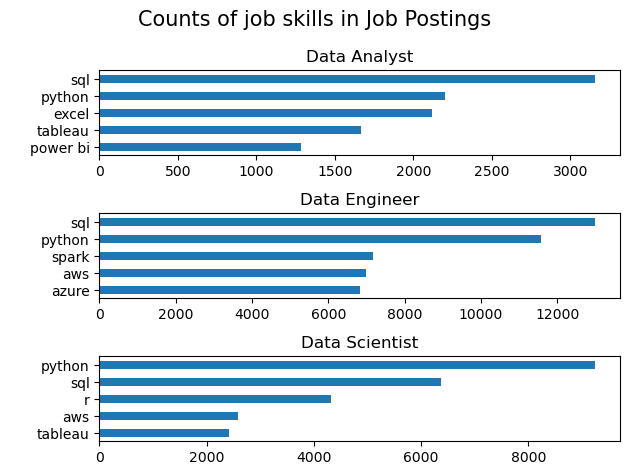

In [39]:
fig, ax = plt.subplots(len(job_titles), 1)

for i,job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count.job_title_short == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title= job_title,legend=False)
    ax[i].invert_yaxis()
    ax[i].set_ylabel(" ")

fig.suptitle("Counts of job skills in Job Postings", fontsize = 15)
plt.tight_layout(h_pad=1)
plt.show()

In [46]:
df_job_title_count = df_India['job_title_short'].value_counts().reset_index(name="job_total")

In [47]:
df_skills_count

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
389,esquisse,Data Scientist,1
887,node.js,Senior Data Analyst,1
753,matlab,Cloud Engineer,1
411,fastapi,Cloud Engineer,1


In [51]:
df_skill_percent = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short' )

df_skill_percent['skill_percent'] =  100 * df_skill_percent['skill_count'] / df_skill_percent['job_total']  

df_skill_percent

,job_skills,job_title_short,skill_count,job_total,skill_percent
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,esquisse,Data Scientist,1,13279,0.007531
1685,node.js,Senior Data Analyst,1,1083,0.092336
1686,matlab,Cloud Engineer,1,351,0.284900
1687,fastapi,Cloud Engineer,1,351,0.284900


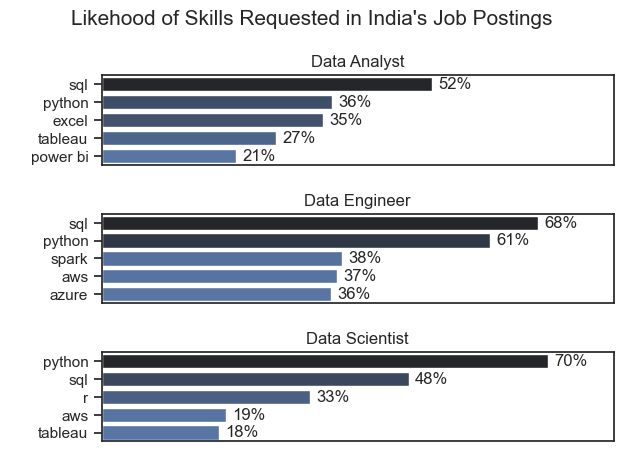

In [84]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i,job_title in enumerate(job_titles):
    df_plot = df_skill_percent[df_skill_percent.job_title_short == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel(" ")
    ax[i].set_xlabel(" ")
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,80)

    for n,v in enumerate(df_plot.skill_percent):
         ax[i].text(v + 1,n,f'{v:.0f}%', va='center')

    ax[i].set_xticks([])

fig.suptitle("Likehood of Skills Requested in India's Job Postings", fontsize = 15)
plt.tight_layout(h_pad=0.5)
plt.show()